In [1]:
# =====================================================
# WEEK 9 (PCA)
# Hands-on: PCA in scikit-learn (Hotel Bookings dataset)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# -------------------------------
# 1) Load dataset
# -------------------------------
url = "https://raw.githubusercontent.com/swapnilsaurav/Dataset/refs/heads/master/hotel_bookings.csv"
df = pd.read_csv(url)

print("Raw shape:", df.shape)
print("Columns:", df.columns.tolist())


Raw shape: (119390, 33)
Columns: ['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [3]:
# -------------------------------
# 2) Keep numeric features + target together (prevents misalignment bugs)
# -------------------------------
target_col = "is_canceled"

numeric_df = df.select_dtypes(include=["int64", "float64"]).copy()

# Safety: drop rows where target missing (rare but keeps alignment perfect)
numeric_df = numeric_df.dropna(subset=[target_col])

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col].astype(int)

print("\nNumeric-only shape (incl target):", numeric_df.shape)
print("X shape:", X.shape, "y shape:", y.shape)



Numeric-only shape (incl target): (119380, 21)
X shape: (119380, 20) y shape: (119380,)


In [4]:
# -------------------------------
# 3) Train-test split (best practice)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)



In [5]:
# -------------------------------
# 4) Impute missing values (median for numeric)
# -------------------------------
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)


In [6]:
# -------------------------------
# 5) Scale data (MANDATORY for PCA)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)



In [7]:
# -------------------------------
# 6) Apply PCA (Hands-on demo with 2 components)
# -------------------------------
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("\nAfter PCA:")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape :", X_test_pca.shape)



After PCA:
X_train_pca shape: (89535, 2)
X_test_pca shape : (29845, 2)


In [8]:
# -------------------------------
# 7) Quick interpretation outputs (for demo)
# -------------------------------
print("\nExplained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Total variance captured by 2 PCs:", pca.explained_variance_ratio_.sum())




Explained variance ratio (PC1, PC2): [0.10077662 0.0901456 ]
Total variance captured by 2 PCs: 0.1909222234305593


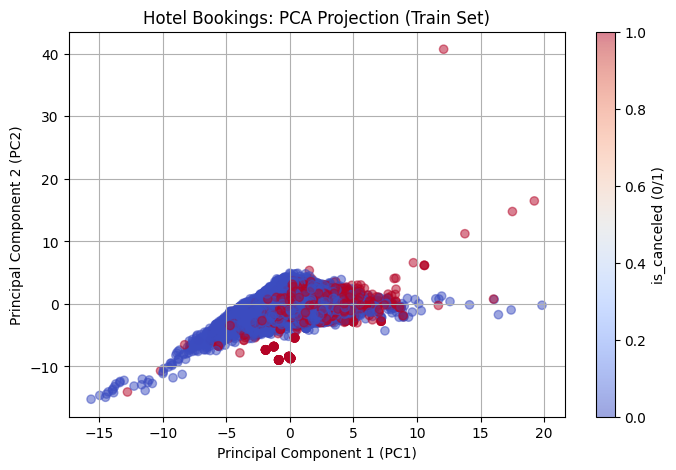

In [9]:
# -------------------------------
# 8) Visualize PCA space (PC1 vs PC2) - Training set
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train.values,          # aligned and safe
    cmap="coolwarm",
    alpha=0.5
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Hotel Bookings: PCA Projection (Train Set)")
plt.colorbar(label="is_canceled (0/1)")
plt.grid(True)
plt.show()


In [10]:
# -------------------------------
# 6) Apply PCA
# -------------------------------
pca_full = PCA(random_state=42)
X_train_pca = pca_full.fit_transform(X_train_scaled)
X_test_pca  = pca_full.transform(X_test_scaled)

print("\nAfter PCA:")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape :", X_test_pca.shape)



After PCA:
X_train_pca shape: (89535, 20)
X_test_pca shape : (29845, 20)


In [11]:
# =========================================================
# 1) Explained Variance Ratio (How much signal each PC carries)
# =========================================================
explained_ratio = pca_full.explained_variance_ratio_     # proportion per PC
cumulative_ratio = np.cumsum(explained_ratio)            # running total

# Print top PCs until we hit 90% variance (useful teaching view)
threshold = 0.90
k_90 = int(np.argmax(cumulative_ratio >= threshold) + 1)

print("---- Explained Variance (Top components) ----")
for i in range(k_90):
    print(f"PC{i+1:02d}: explained={explained_ratio[i]:.4f} | cumulative={cumulative_ratio[i]:.4f}")

print(f"\nComponents needed for {int(threshold*100)}% variance: {k_90}")

---- Explained Variance (Top components) ----
PC01: explained=0.1008 | cumulative=0.1008
PC02: explained=0.0901 | cumulative=0.1909
PC03: explained=0.0802 | cumulative=0.2711
PC04: explained=0.0692 | cumulative=0.3403
PC05: explained=0.0654 | cumulative=0.4057
PC06: explained=0.0552 | cumulative=0.4608
PC07: explained=0.0535 | cumulative=0.5143
PC08: explained=0.0512 | cumulative=0.5654
PC09: explained=0.0494 | cumulative=0.6148
PC10: explained=0.0482 | cumulative=0.6630
PC11: explained=0.0480 | cumulative=0.7110
PC12: explained=0.0456 | cumulative=0.7567
PC13: explained=0.0427 | cumulative=0.7994
PC14: explained=0.0405 | cumulative=0.8399
PC15: explained=0.0384 | cumulative=0.8782
PC16: explained=0.0338 | cumulative=0.9120

Components needed for 90% variance: 16


In [12]:
# =========================================================
# 2) Eigenvalues (Strength of each component direction)
# =========================================================
# In sklearn PCA, explained_variance_ corresponds to eigenvalues of covariance matrix
eigenvalues = pca_full.explained_variance_

print("\n---- Eigenvalues (Top 10) ----")
for i in range(min(10, len(eigenvalues))):
    print(f"PC{i+1:02d}: eigenvalue={eigenvalues[i]:.4f} | explained_ratio={explained_ratio[i]:.4f}")




---- Eigenvalues (Top 10) ----
PC01: eigenvalue=2.0156 | explained_ratio=0.1008
PC02: eigenvalue=1.8029 | explained_ratio=0.0901
PC03: eigenvalue=1.6034 | explained_ratio=0.0802
PC04: eigenvalue=1.3837 | explained_ratio=0.0692
PC05: eigenvalue=1.3079 | explained_ratio=0.0654
PC06: eigenvalue=1.1032 | explained_ratio=0.0552
PC07: eigenvalue=1.0691 | explained_ratio=0.0535
PC08: eigenvalue=1.0234 | explained_ratio=0.0512
PC09: eigenvalue=0.9876 | explained_ratio=0.0494
PC10: eigenvalue=0.9643 | explained_ratio=0.0482


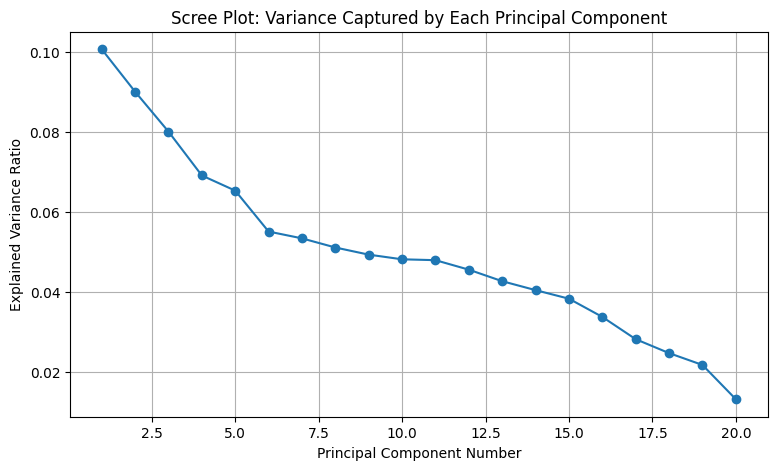

In [13]:
# =========================================================
# 3) Scree plot: explained variance ratio (diminishing returns)
# =========================================================
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(explained_ratio) + 1), explained_ratio, marker="o")
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot: Variance Captured by Each Principal Component")
plt.grid(True)
plt.show()



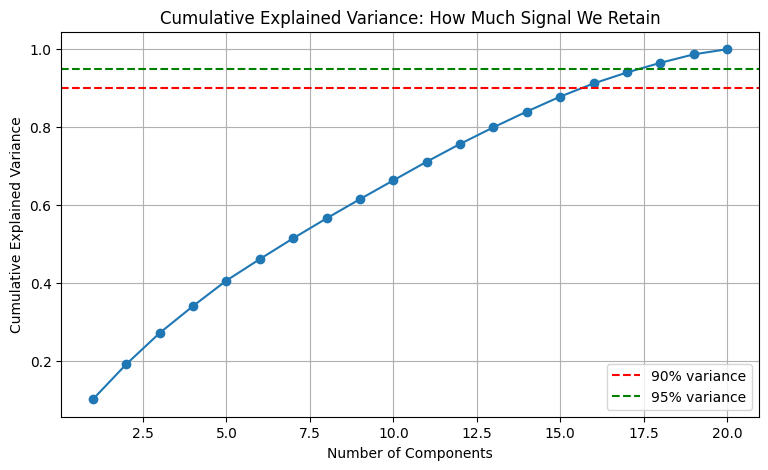

In [14]:
# =========================================================
# 4) Cumulative explained variance plot (responsible selection support)
# =========================================================
plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cumulative_ratio) + 1), cumulative_ratio, marker="o")
plt.axhline(y=0.90, color="r", linestyle="--", label="90% variance")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance: How Much Signal We Retain")
plt.legend()
plt.grid(True)
plt.show()



In [15]:
# =========================================================
# 5) Loadings (What original features shape each component)
# =========================================================
# components_ shape: (n_components, n_features)
# Transpose makes it: (n_features, n_components)
loadings = pd.DataFrame(
    pca_full.components_.T,
    index=X_train.columns,
    columns=[f"PC{i+1}" for i in range(pca_full.n_components_)]
)

# Explain PC1 and PC2 using top absolute loadings
def top_loadings(pc: str, n=10):
    return loadings[pc].abs().sort_values(ascending=False).head(n)

print("\n---- Top Feature Contributions ----")
print("\nTop features influencing PC1:")
print(top_loadings("PC1", n=10))

print("\nTop features influencing PC2:")
print(top_loadings("PC2", n=10))



---- Top Feature Contributions ----

Top features influencing PC1:
stays_in_week_nights              0.474037
stays_in_weekend_nights           0.433960
agent                             0.391955
id                                0.387259
is_repeated_guest                 0.275142
previous_bookings_not_canceled    0.240482
adults                            0.206408
lead_time                         0.162869
adr                               0.125658
arrival_date_week_number          0.114540
Name: PC1, dtype: float64

Top features influencing PC2:
arrival_date_year                 0.505976
id                                0.399635
adr                               0.390764
arrival_date_week_number          0.311602
is_repeated_guest                 0.275464
previous_bookings_not_canceled    0.249524
children                          0.215224
previous_cancellations            0.214549
adults                            0.209203
agent                             0.172054
Name: PC2, dtyp

In [16]:
# =========================================================
# 6) Responsible-use check: components may be hard to interpret
#    Show both magnitude AND sign for PC1 top features
# =========================================================
pc1_top = loadings["PC1"].abs().sort_values(ascending=False).head(10).index
pc1_signed = loadings.loc[pc1_top, "PC1"].sort_values(key=lambda s: s.abs(), ascending=False)

print("\n---- PC1 Signed Loadings (Direction Matters) ----")
print(pc1_signed)



---- PC1 Signed Loadings (Direction Matters) ----
stays_in_week_nights              0.474037
stays_in_weekend_nights           0.433960
agent                             0.391955
id                               -0.387259
is_repeated_guest                -0.275142
previous_bookings_not_canceled   -0.240482
adults                            0.206408
lead_time                         0.162869
adr                               0.125658
arrival_date_week_number          0.114540
Name: PC1, dtype: float64


In [17]:
# =========================================================
# 7) Quick takeaway summary (for narration)
# =========================================================
print("\n===== Responsible PCA Interpretation Summary =====")
print(f"Total components available: {pca_full.n_components_}")
print(f"PC1 explains: {explained_ratio[0]:.2%} of variance")
print(f"PC1+PC2 explain: {explained_ratio[:2].sum():.2%} of variance")
print(f"Components for 90% variance: {k_90}")
print("Reminder: PCA is unsupervised—variance is not the same as predictive power.")



===== Responsible PCA Interpretation Summary =====
Total components available: 20
PC1 explains: 10.08% of variance
PC1+PC2 explain: 19.09% of variance
Components for 90% variance: 16
Reminder: PCA is unsupervised—variance is not the same as predictive power.


<h2>Visualizing Principal Components (Hotel Bookings Dataset)</h2>

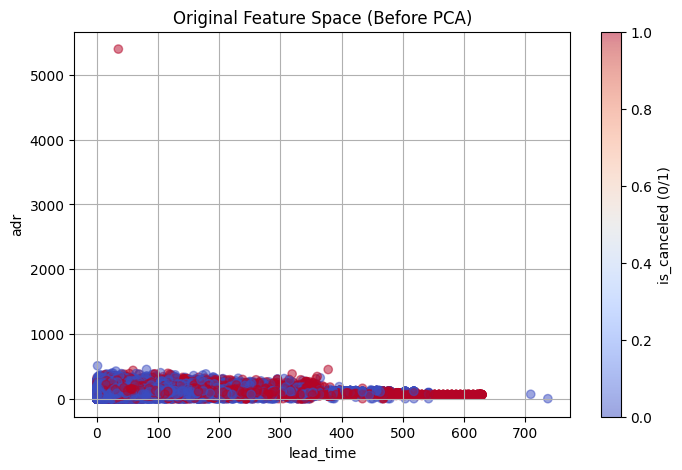

In [22]:
#Visualization 1: Original Feature Space (Before PCA)
# ---------------------------------------
# VISUAL 1: Original Feature Space
# ---------------------------------------

# Choose two representative original features
feature_x = "lead_time"
feature_y = "adr"

plt.figure(figsize=(8, 5))
plt.scatter(
    X_train[feature_x],
    X_train[feature_y],
    c=y_train.values,
    cmap="coolwarm",
    alpha=0.5
)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Original Feature Space (Before PCA)")
plt.colorbar(label="is_canceled (0/1)")
plt.grid(True)
plt.show()


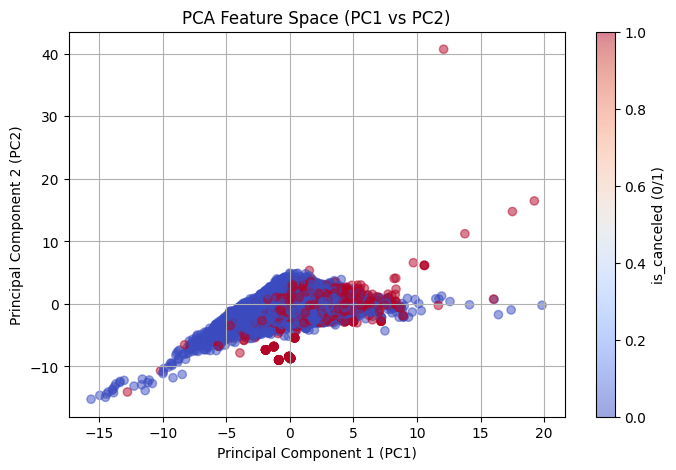

In [23]:
#Visualization 2: PCA Space (PC1 vs PC2)
# ---------------------------------------
# VISUAL 2: PCA Feature Space
# ---------------------------------------

plt.figure(figsize=(8, 5))
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train.values,
    cmap="coolwarm",
    alpha=0.5
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Feature Space (PC1 vs PC2)")
plt.colorbar(label="is_canceled (0/1)")
plt.grid(True)
plt.show()


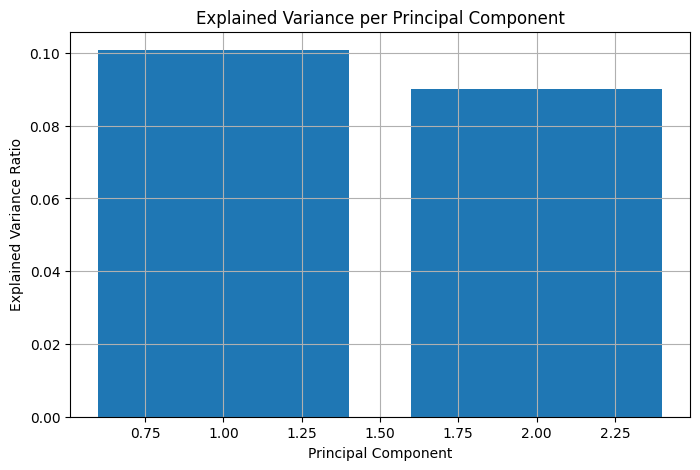

In [24]:
#Visualization 3: Explained Variance Bar Chart
# ---------------------------------------
# VISUAL 3: Explained Variance per Component
# ---------------------------------------

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance per Principal Component")
plt.grid(True)
plt.show()


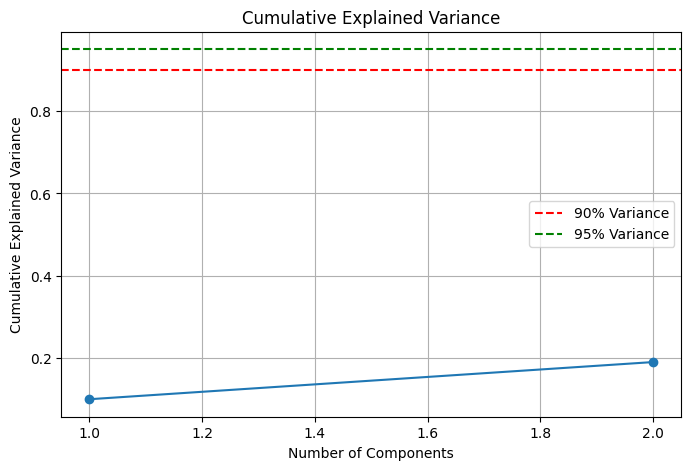

In [25]:
#Visualization 4: Cumulative Explained Variance
# ---------------------------------------
# VISUAL 4: Cumulative Explained Variance
# ---------------------------------------

cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker="o")
plt.axhline(y=0.90, color="r", linestyle="--", label="90% Variance")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()
